<a href="https://colab.research.google.com/github/bdfd/Portfolio_Project06_China_GDP_Prediction/blob/main/China_GDP_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#China GDP Prediction

##Basic Approach

The Approach
1. Perform some quick EDA(Exploratory Data Analysis)
2. Use Scikit-Learn Regression Algorithm
3. Covert data into an array
4. Converting the target variable int regression

Target Cluster
Datasets is about a set of data regarding China GPD with following regreesion model
*   Regression Model:
  *   1. Linear Regression
  *   2. Cubic Regression
  *   3. Quadratic Regression
  *   4. Exponential Regression
  *   5. Logarithmic Regression
  *   6. Sigmodial/Logistic Regression
  

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [14]:
# read the dataset
data_path = 'https://raw.githubusercontent.com/bdfd/Portfolio_Project06_China_GDP_Prediction/main/dataset/China%20GDP.csv'
# upload dataset into data frame
df = pd.read_csv(data_path)
df.head(3)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10


## Model the Basic Regression

### Linear Regression

In [24]:
x = np.arange(-5.0, 5.0, 0.1)
## add some noise on y variable
y = 2*x + 7
y_noise = 2 * np.random.normal(size= x.size)
ydata = y + y_noise

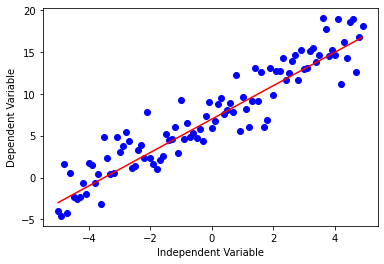

In [25]:
# plot the ydata and y
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Cubic Regression 

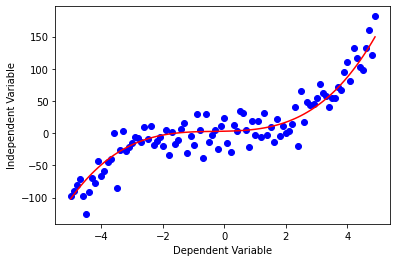

In [23]:
x = np.arange(-5.0, 5.0, 0.1)
## adjust the slope and intercept to verify the changes in the graph
y = (x**3) + (x**2) + x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.xlabel('Dependent Variable')
plt.ylabel('Independent Variable')
plt.show()

### Quadratic Regression

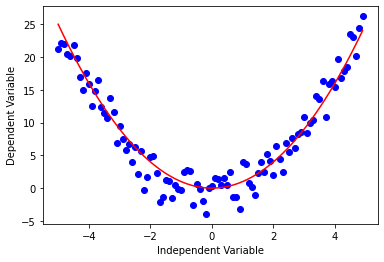

In [26]:
x = np.arange(-5.0, 5.0, 0.1)
## ajust the slope and intercept to verify the changes in the graph
y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Exponential Regression
$$ y = a + b c^x$$

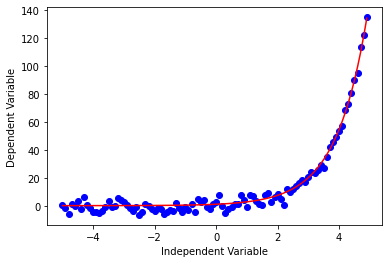

In [31]:
x = np.arange(-5.0, 5.0, 0.1)
## ajust the slope and intercept to verify the change in the graph
y = np.exp(x)
y_noise = 3 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Logarithmic Regression

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Text(0.5, 0, 'Independent Variable')

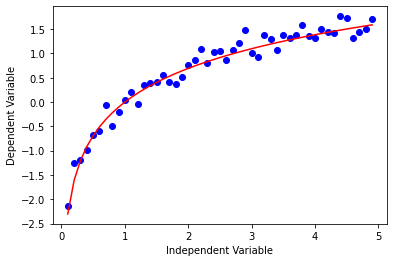

In [36]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.log(x)
y_noise = 0.2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

### Sigmoidal/Logistic Regression
$$ y = a + \frac{b}{1+ c^{(x-d)}}$$

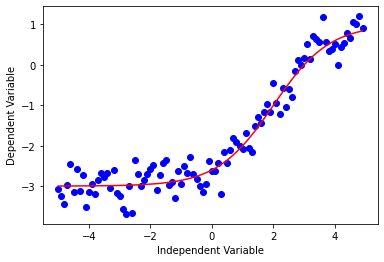

In [41]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1-4/(1 + np.power(3, x-2))
y_noise = 0.3 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Model the Sigmoidal Regression

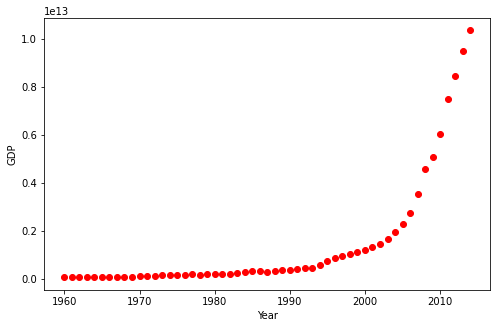

In [3]:
#plotout the point in dataset
plt.figure(figsize=(8,5))
x_data, y_data = (df['Year'].values, df['Value'].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [4]:
# define the sigmoid function
def sigmoid(x, Beta_1, Beta_2):
  y = 1 / (1+ np.exp(-Beta_1*(x - Beta_2)))
  return y

In [5]:
# find a reference point
beta_1 = 0.10
beta_2 =1990.0

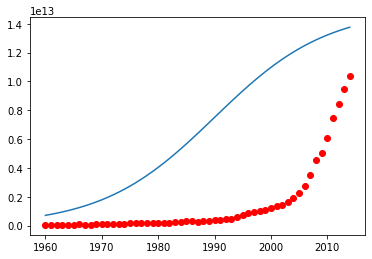

In [6]:
# test logistic function and plot initial prediction against datapoints
Y_pred = sigmoid(x_data, beta_1, beta_2)
plt.plot(x_data, Y_pred*15000000000000)
plt.plot(x_data, y_data, 'ro')

In [7]:
# let normalize our data
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [8]:
# from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
# print the final parameters 
print('beta_1 = %f, beta_2 = %f' % (popt[0], popt[1]))

beta_1 = 690.453019, beta_2 = 0.997207


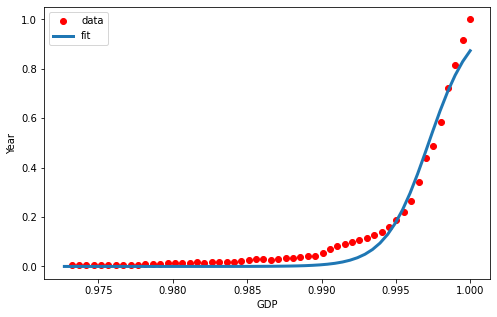

In [9]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize = (8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.xlabel('GDP')
plt.ylabel('Year')
plt.show()

## Evaluating the Machine Learning Model

In [10]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

In [13]:
# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)
# predict using test set
y_hat = sigmoid(test_x, *popt)